In [56]:
#https://pypi.org/project/geopy/
#https://www.latlong.net/
#https://www.oreilly.com/library/view/graph-algorithms/9781492047674/ch04.html
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

#
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import os.path

In [57]:
geolocator = Nominatim(user_agent='dungvt.vule@gmail.com')
location = geolocator.geocode("98 Edinburgh St, San Francisco, CA 94112, USA")
print(location.address, location.latitude, location.longitude)

98, Edinburgh Street, Excelsior, San Francisco, San Francisco City and County, California, 94112, United States of America 37.727605 -122.427311


In [58]:
Employee_Addresses_path = './Employee_Addresses.csv'
Potentail_Bus_Stops_path = './Potentail_Bus_Stops.csv'
Employee_Addresses_with_latitude_longitude_path = 'Employee_Addresses_with_latitude_longitude.csv'


In [59]:
Employee_Addresses_df = pd.read_csv(Employee_Addresses_path)
Potentail_Bus_Stops_df = pd.read_csv(Potentail_Bus_Stops_path)
Employee_Addresses_with_latitude_longitude_df = None
#
if (os.path.isfile('./' + 'Employee_Addresses_with_latitude_longitude.csv') == True):
    Employee_Addresses_with_latitude_longitude_df = pd.read_csv('./' + 'Employee_Addresses_with_latitude_longitude.csv')
#
#
if (os.path.isfile('./' + 'Potentail_Bus_Stops_with_latitude_longitude.csv') == True):
    Potentail_Bus_Stops_with_latitude_longitude_df = pd.read_csv('./' + 'Potentail_Bus_Stops_with_latitude_longitude.csv')

#-----------
Employee_Addresses_with_latitude_longitude_df = pd.DataFrame.drop_duplicates(Employee_Addresses_with_latitude_longitude_df)
Employee_Addresses_with_latitude_longitude_df

#-----------
Potentail_Bus_Stops_with_latitude_longitude_df = pd.DataFrame.drop_duplicates(Potentail_Bus_Stops_with_latitude_longitude_df)
Potentail_Bus_Stops_with_latitude_longitude_df

Potentail_Bus_Stops_with_latitude_longitude_df.head(-1)

,Street_One,Street_Two,latitude,longitude
0,MISSION ST,ITALY AVE,37.718696,-122.439211
1,MISSION ST,NEW MONTGOMERY ST,37.787460,-122.400490
2,MISSION ST,01ST ST,37.789780,-122.397560
3,MISSION ST,20TH ST,37.758812,-122.418988
4,MISSION ST,FREMONT ST,37.790306,-122.396762
...,...,...,...,...
113,MISSION ST,OTTAWA AVE,37.713590,-122.443720
114,MISSION ST,NIAGARA AVE,37.715570,-122.441700
115,MISSION ST,ACTON ST,37.708878,-122.452239
116,MISSION ST,05TH ST,37.774500,-122.396170


In [60]:
geolocator = Nominatim(user_agent='dungvt.vule@gmail.com')
def get_latitude_longitude(address, employee_id):    
    location = geolocator.geocode(address)
    dic = {}
    dic['address'] = address
    dic['employee_id'] = employee_id
    dic['latitude'] = 0
    dic['longitude'] = 0
    if location != None:
        dic['latitude'] = location.latitude
        dic['longitude'] = location.longitude
    print(employee_id, '--', address, '--', dic['latitude'], '--', dic['longitude'])
    ret = pd.Series(dic)
    return ret

#to test:
def get_latitude_longitude_bus_stop(street_one, street_two):  
    street_two = street_two if street_two.find(' ST', 0, len(street_two)) else street_two + ' ST' 
    merge_address = street_one + ' & ' + street_two + ', SF, USA'
    
    print('merge_address: ', merge_address)
    location = geolocator.geocode(merge_address)
    
    dic = {}
    dic['Street_One'] = street_one
    dic['Street_Two'] = street_two
    dic['latitude'] = 0
    dic['longitude'] = 0
    if location != None:
        dic['latitude'] = location.latitude
        dic['longitude'] = location.longitude
    print(merge_address, '--', dic['latitude'], '--', dic['longitude'])
    ret = pd.Series(dic)
    return ret

In [61]:
get_latitude_longitude_bus_stop('MISSION Street', 'FREMONT ST')

merge_address:  MISSION Street & FREMONT ST, SF, USA
MISSION Street & FREMONT ST, SF, USA -- 37.790306 -- -122.3967619


Street_One    MISSION Street
Street_Two        FREMONT ST
latitude             37.7903
longitude           -122.397
dtype: object

# Visualize address & bus-stop

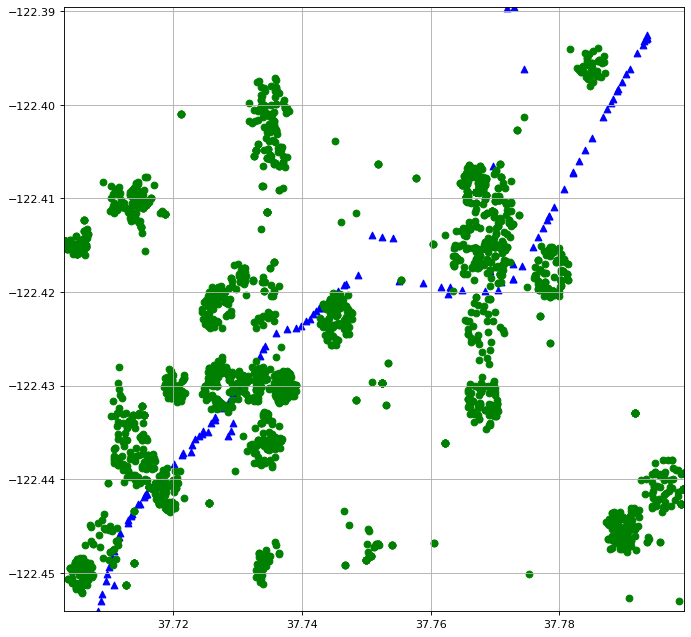

In [62]:
plt.figure(figsize=(10, 10), dpi=80)

x_min_value = Employee_Addresses_with_latitude_longitude_df['latitude'].min()
x_max_value = Employee_Addresses_with_latitude_longitude_df['latitude'].max()
#
y_min_value = Potentail_Bus_Stops_with_latitude_longitude_df['longitude'].min()
y_max_value = Potentail_Bus_Stops_with_latitude_longitude_df['longitude'].max()
#

plt.scatter('latitude', 'longitude', data=Potentail_Bus_Stops_with_latitude_longitude_df, marker='^', c= 'b')
plt.scatter('latitude', 'longitude', data=Employee_Addresses_with_latitude_longitude_df, marker='o', c= 'g')

plt.xlim(x_min_value, x_max_value)
plt.ylim(y_min_value, y_max_value)

plt.grid(True, which='both')

plt.show()

</b>Scale Employee_Addresses & Bus_Stops</b>

In [63]:
data_employee = Employee_Addresses_with_latitude_longitude_df[['latitude', 'longitude']]
data_employee = data_employee.to_numpy()
#
data_bus_stop = Potentail_Bus_Stops_with_latitude_longitude_df[['latitude', 'longitude']]
data_bus_stop = data_bus_stop.to_numpy()

#
data_employee_scaled = scale(data_employee)
data_bus_stop_scaled  = scale(data_bus_stop)


In [64]:
new_data_bus_stop_df = pd.DataFrame(data=data_bus_stop_scaled, columns=['latitule_scaled', 'longitude_scaled'])
new_data_bus_stop_df

,latitule_scaled,longitude_scaled
0,-1.061095,-0.980400
1,1.344793,1.266041
2,1.425964,1.436030
3,0.342459,0.192851
4,1.444368,1.482333
...,...,...
114,-1.170470,-1.124833
115,-1.404590,-1.736272
116,0.891353,1.516674
117,0.121624,0.477592


In [65]:
data_bus_stop = pd.concat([Potentail_Bus_Stops_with_latitude_longitude_df, new_data_bus_stop_df], axis=1)
data_bus_stop

,Street_One,Street_Two,latitude,longitude,latitule_scaled,longitude_scaled
0,MISSION ST,ITALY AVE,37.718696,-122.439211,-1.061095,-0.980400
1,MISSION ST,NEW MONTGOMERY ST,37.787460,-122.400490,1.344793,1.266041
2,MISSION ST,01ST ST,37.789780,-122.397560,1.425964,1.436030
3,MISSION ST,20TH ST,37.758812,-122.418988,0.342459,0.192851
4,MISSION ST,FREMONT ST,37.790306,-122.396762,1.444368,1.482333
...,...,...,...,...,...,...
114,MISSION ST,NIAGARA AVE,37.715570,-122.441700,-1.170470,-1.124833
115,MISSION ST,ACTON ST,37.708878,-122.452239,-1.404590,-1.736272
116,MISSION ST,05TH ST,37.774500,-122.396170,0.891353,1.516674
117,MISSION ST,24TH ST,37.752500,-122.414080,0.121624,0.477592


In [66]:
data_employee_scaled

array([[-0.60932331, -0.13068204],
       [-1.46773128,  0.66952318],
       [ 0.88256224,  0.70189428],
       ...,
       [-0.48580132,  0.55916651],
       [-1.02971119, -1.07849528],
       [ 0.6722226 ,  0.81116957]])

# Active K-mean for unsupervied 

In [67]:
n_digits = 10 # 10 bus-stop
#
#reduced_data = PCA(n_components=2).fit_transform(data_employee_scaled)
#kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
#kmeans.fit(reduced_data)

kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(data_employee_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
reduced_data

array([[-0.5232628 , -0.33845048],
       [-0.56441836, -1.51126712],
       [ 1.12037995,  0.12775154],
       ...,
       [ 0.05187702, -0.73890384],
       [-1.49072709,  0.03449556],
       [ 1.04891666, -0.09825034]])

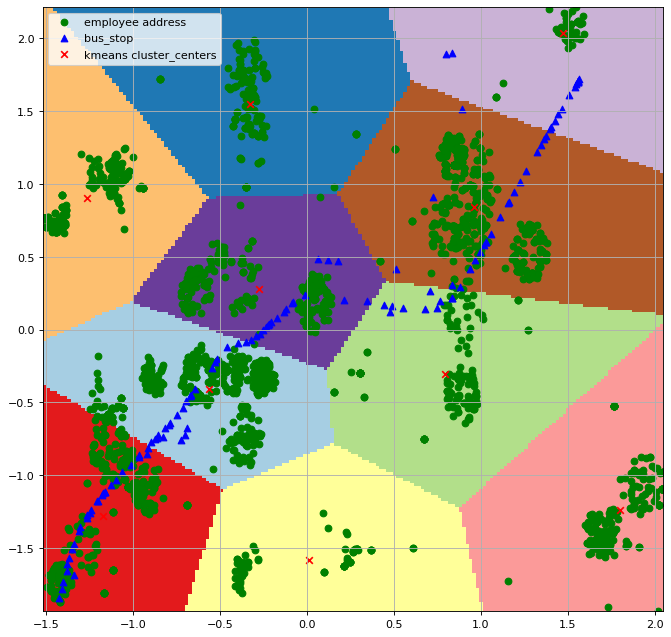

In [69]:
plt.figure(figsize=(10, 10), dpi=80)

x_min_value = data_employee_scaled[:, 0].min()
x_max_value = data_employee_scaled[:, 0].max()
#
y_min_value = data_employee_scaled[:, 1].min()
y_max_value = data_employee_scaled[:, 1].max()
#
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x_min_value, x_max_value
y_min, y_max = y_min_value, y_max_value
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

#
plt.scatter(data_employee_scaled[:, 0], data_employee_scaled[:, 1], marker='o', c= 'g', label='employee address')
plt.scatter(data_bus_stop_scaled[:, 0], data_bus_stop_scaled[:, 1], marker='^', c= 'b', label='bus_stop')
#
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c= 'r', label='kmeans cluster_centers')

#
plt.xlim(x_min_value, x_max_value)
plt.ylim(y_min_value, y_max_value)
plt.legend(loc='best')
plt.grid(True, which='both')

plt.show()

In [70]:
new_pd = pd.DataFrame(data=data_bus_stop_scaled, columns=['latitule_scaled', 'longitude_scaled'])
new_pd

,latitule_scaled,longitude_scaled
0,-1.061095,-0.980400
1,1.344793,1.266041
2,1.425964,1.436030
3,0.342459,0.192851
4,1.444368,1.482333
...,...,...
114,-1.170470,-1.124833
115,-1.404590,-1.736272
116,0.891353,1.516674
117,0.121624,0.477592


In [71]:
import math
def find_distance(idx, latitule_scaled, longitude_scaled):
    p1 = [latitule_scaled, longitude_scaled]
    p2 = [centroids[idx][0], centroids[idx][1]]
    
    distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    return distance

In [72]:
data_bus_stop['distance_0'] = data_bus_stop.apply(lambda row: find_distance(0, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_1'] = data_bus_stop.apply(lambda row: find_distance(1, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_2'] = data_bus_stop.apply(lambda row: find_distance(2, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_3'] = data_bus_stop.apply(lambda row: find_distance(3, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_4'] = data_bus_stop.apply(lambda row: find_distance(4, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_5'] = data_bus_stop.apply(lambda row: find_distance(5, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_6'] = data_bus_stop.apply(lambda row: find_distance(6, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_7'] = data_bus_stop.apply(lambda row: find_distance(7, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_8'] = data_bus_stop.apply(lambda row: find_distance(8, row['latitule_scaled'], row['longitude_scaled']), axis = 1)
data_bus_stop['distance_9'] = data_bus_stop.apply(lambda row: find_distance(9, row['latitule_scaled'], row['longitude_scaled']), axis = 1)

In [73]:
data_bus_stop

,Street_One,Street_Two,latitude,longitude,latitule_scaled,longitude_scaled,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9
0,MISSION ST,ITALY AVE,37.718696,-122.439211,-1.061095,-0.980400,0.760911,2.631520,1.972934,2.874804,0.320681,1.896766,3.939362,1.485573,1.231492,2.720840
1,MISSION ST,NEW MONTGOMERY ST,37.787460,-122.400490,1.344793,1.266041,2.536134,1.695288,1.668057,2.545700,3.580227,2.637255,0.780398,1.896913,3.147781,0.573005
2,MISSION ST,01ST ST,37.789780,-122.397560,1.425964,1.436030,2.710249,1.756558,1.855429,2.700599,3.758733,2.745437,0.601663,2.057145,3.336151,0.755267
3,MISSION ST,20TH ST,37.758812,-122.418988,0.342459,0.192851,1.084869,1.510358,0.674564,2.044174,2.112708,1.760600,2.162039,0.624975,1.808818,0.895530
4,MISSION ST,FREMONT ST,37.790306,-122.396762,1.444368,1.482333,2.755300,1.772641,1.905233,2.743998,3.804973,2.772764,0.554263,2.098559,3.385890,0.803154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,MISSION ST,NIAGARA AVE,37.715570,-122.441700,-1.170470,-1.124833,0.941758,2.801477,2.127247,2.974755,0.157051,2.032244,4.120313,1.666070,1.268565,2.899007
115,MISSION ST,ACTON ST,37.708878,-122.452239,-1.404590,-1.736272,1.574693,3.455254,2.621453,3.245156,0.511196,2.644907,4.744312,2.311331,1.424122,3.497990
116,MISSION ST,05TH ST,37.774500,-122.396170,0.891353,1.516674,2.410173,1.218827,1.827686,2.901563,3.476015,2.243948,0.779527,1.700113,3.224466,0.677272
117,MISSION ST,24TH ST,37.752500,-122.414080,0.121624,0.477592,1.117183,1.159447,1.034271,2.401701,2.182897,1.453553,2.062508,0.443841,2.065963,0.913149


#Tìm vị trí bus-stop có distance nhỏ nhất

In [74]:
bus_stop_location_min_distances = []
for i in range(10):
    column = 'distance_' + str(i)
    min_distance = data_bus_stop[column].min()
    bus_stop_location = data_bus_stop[data_bus_stop[column] == min_distance]
    bus_stop_location_min_distances.append(bus_stop_location)

## Vẽ đường thẳng từ vị trí min-distanct tới Kmeans centers

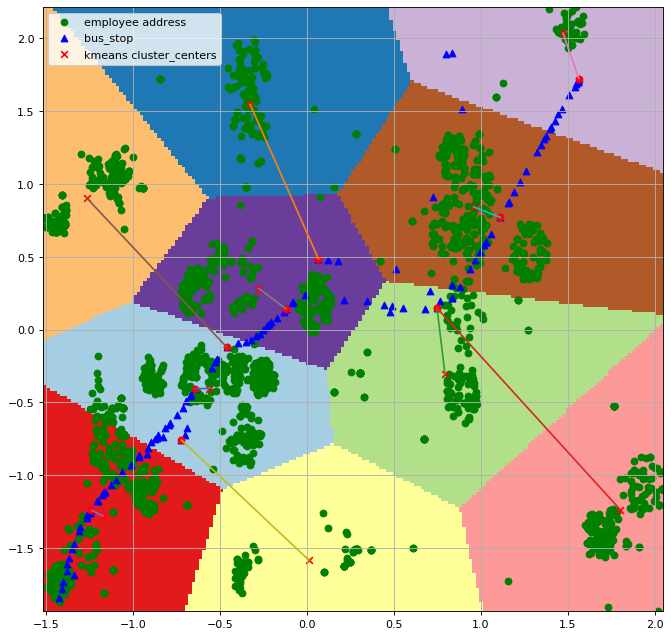

In [80]:
plt.figure(figsize=(10, 10), dpi=80)

x_min_value = data_employee_scaled[:, 0].min()
x_max_value = data_employee_scaled[:, 0].max()
#
y_min_value = data_employee_scaled[:, 1].min()
y_max_value = data_employee_scaled[:, 1].max()
#
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = x_min_value, x_max_value
y_min, y_max = y_min_value, y_max_value
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

centroids = kmeans.cluster_centers_


#
plt.scatter(data_employee_scaled[:, 0], data_employee_scaled[:, 1], marker='o', c= 'g', label='employee address')
plt.scatter(data_bus_stop_scaled[:, 0], data_bus_stop_scaled[:, 1], marker='^', c= 'b', label='bus_stop')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c= 'r', label='kmeans cluster_centers')

for i in range(10):
    bus_stop_min_location = bus_stop_location_min_distances[i]
    plt.scatter(bus_stop_min_location['latitule_scaled'].to_numpy(), bus_stop_min_location['longitude_scaled'].to_numpy(), marker='o', c= 'r')
    plt.plot([bus_stop_min_location['latitule_scaled'].to_numpy()[0], centroids[i][0]], [bus_stop_min_location['longitude_scaled'].to_numpy()[0], centroids[i][1]], linestyle='solid')



#
plt.xlim(x_min_value, x_max_value)
plt.ylim(y_min_value, y_max_value)
plt.legend(loc='best')
plt.grid(True, which='both')

plt.show()

In [76]:
Top_10_bus_stop = pd.concat([bus_stop_location_min_distances[0],
                           bus_stop_location_min_distances[1],
                           bus_stop_location_min_distances[2],
                           bus_stop_location_min_distances[3],
                           bus_stop_location_min_distances[4],
                           bus_stop_location_min_distances[5],
                           bus_stop_location_min_distances[6],
                           bus_stop_location_min_distances[7],
                           bus_stop_location_min_distances[8],
                           bus_stop_location_min_distances[9]], axis = 0)

In [77]:
Top_10_bus_stop

,Street_One,Street_Two,latitude,longitude,latitule_scaled,longitude_scaled,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9
17,MISSION ST,TRUMBULL ST,37.730611,-122.429318,-0.644206,-0.406457,0.081918,1.978716,1.441416,2.583872,1.021388,1.452178,3.232140,0.779674,1.349062,2.032105
85,MISSION ST,25TH ST,37.750910,-122.413930,0.065994,0.486295,1.091124,1.130909,1.077666,2.447075,2.157564,1.397847,2.092922,0.399146,2.072446,0.961133
5,MISSION ST,13TH ST,37.770402,-122.419779,0.747987,0.146966,1.422099,1.764947,0.457683,1.740691,2.392019,2.153489,2.023196,1.032988,1.882444,0.726954
5,MISSION ST,13TH ST,37.770402,-122.419779,0.747987,0.146966,1.422099,1.764947,0.457683,1.740691,2.392019,2.153489,2.023196,1.032988,1.882444,0.726954
113,MISSION ST,OTTAWA AVE,37.713590,-122.443720,-1.239745,-1.242027,1.076216,2.934250,2.237685,3.041870,0.079999,2.147295,4.254712,1.802141,1.297535,3.029676
63,MISSION ST,RICHLAND AVE,37.735869,-122.424427,-0.460259,-0.122719,0.300895,1.674706,1.267803,2.522452,1.359389,1.307003,2.897633,0.443614,1.536917,1.716171
43,MISSION ST,THE EMBARCADERO,37.793710,-122.392590,1.563466,1.724374,3.009390,1.898902,2.173589,2.972214,4.063436,2.947272,0.324414,2.338405,3.655594,1.069180
8,MISSION ST,FAIR AVE,37.745620,-122.419880,-0.119091,0.141095,0.703922,1.420899,1.017622,2.365086,1.769204,1.379441,2.474738,0.210392,1.731463,1.285963
39,MISSION ST,COTTER ST,37.728400,-122.435410,-0.721578,-0.759907,0.388296,2.340080,1.581277,2.568632,0.688394,1.752253,3.554113,1.132106,1.104052,2.321949
32,MISSION ST,06TH ST,37.780798,-122.409026,1.111705,0.770809,2.046128,1.634673,1.125049,2.124375,3.069442,2.383135,1.315588,1.471889,2.600441,0.169177


In [78]:
import folium

m = folium.Map()

for i in range(10):
    folium.Marker(
        location=[Top_10_bus_stop.iloc[i]['latitude'], Top_10_bus_stop.iloc[i]['longitude']],
        popup= Top_10_bus_stop.iloc[i].Street_One + '&' + Top_10_bus_stop.iloc[i].Street_Two,
        icon=folium.Icon(icon='cloud')
    ).add_to(m)

m